<a href="https://colab.research.google.com/github/aksha1234/Deep-learning-tutorials/blob/main/HouseSalePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [3]:
!pip install opendatasets --upgrade --q

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import plotly.express as px
import opendatasets as od
import sklearn

In [5]:
url='https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data'

In [6]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshaykadwe
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 39.3MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [7]:
import os

In [8]:
os.listdir('house-prices-advanced-regression-techniques')

['train.csv', 'test.csv', 'data_description.txt', 'sample_submission.csv']

In [120]:
train_df=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [121]:
test_df=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [122]:
sample_df=pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [123]:
with open("house-prices-advanced-regression-techniques/data_description.txt") as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [125]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [126]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Lot frontage is having 259 values to be missing so lets use the imouter to calculate the missing values using mean startegy

In [129]:
## Lets us find out the categorical and numerical cols from the dataset
input_cols=train_df.columns.tolist()[1:-1]
numerical_cols=train_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_df[input_cols].select_dtypes(include='object').columns.tolist()
output_cols=train_df.columns.tolist()[-1]

In [131]:
from sklearn.impute import SimpleImputer

In [132]:
imputer=SimpleImputer(strategy='mean')

In [133]:
train_df[numerical_cols]=imputer.fit_transform(train_df[numerical_cols])

## As it can be seen all the null values are replaced with the mean values and hence we get the zero.

## Now to eliminate the disproprtionate effect of the feature we need to use the `normalization` for numerical values and one hot encoding for the categorical columns.

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [136]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [137]:
encode_cols=encoder.get_feature_names(categorical_cols).tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [138]:
train_df[encode_cols]=encoder.transform(train_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [139]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20.0,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70.0,RL,66.0,9042.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20.0,RL,68.0,9717.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
df=train_df[numerical_cols+encode_cols].copy()

## Now standardising the columns

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler=StandardScaler()

In [143]:
df[numerical_cols+encode_cols]=scaler.fit_transform(df[numerical_cols+encode_cols])

In [144]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


## Now let us use different machine learning modules to predict teh results

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
train_inputs,val_inputs,train_outputs,val_outputs=train_test_split(df,train_df[output_cols],test_size=0.2,random_state=42)

In [147]:
train_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-0.872563,-0.002269,-0.212153,-0.795151,0.381743,-0.472560,-1.350194,-0.574410,1.049169,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1066,0.073375,-0.501895,-0.268578,-0.071836,1.280685,0.719786,0.442586,-0.574410,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
638,-0.636078,-0.138531,-0.174369,-0.795151,1.280685,-2.029235,-1.689368,-0.574410,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
799,-0.163109,-0.456474,-0.332419,-0.795151,1.280685,-1.134975,-1.689368,0.821655,0.274948,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
380,-0.163109,-0.910680,-0.552908,-0.795151,0.381743,-1.565545,-1.689368,-0.574410,-0.494887,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.872563,0.361095,-0.120249,-0.071836,-0.517200,1.150356,1.024029,-0.574410,-0.920380,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1130,-0.163109,-0.229372,-0.271885,-1.518467,-2.315085,-1.433062,-1.689368,-0.574410,0.391191,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1294,-0.872563,-0.456474,-0.235003,-0.795151,1.280685,-0.538802,0.248772,-0.574410,-0.606743,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
860,-0.163109,-0.683577,-0.288121,0.651479,2.179628,-1.764269,0.636400,-0.574410,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [148]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
model=RandomForestRegressor(n_estimators=20,max_depth=30,max_features=0.6,n_jobs=-1,random_state=42).fit(train_inputs,train_outputs)

In [190]:
preds=model.predict(val_inputs)

In [151]:
from sklearn.metrics import accuracy_score, classification_report

In [152]:
train_score=model.score(train_inputs,train_outputs)

In [153]:
val_score=model.score(val_inputs,val_outputs)

In [154]:
print(' The score for the random forest training model is {} \n and for the validation model is {}'.format(train_score*100,val_score*100))

 The score for the random forest training model is 97.8455041931426 
 and for the validation model is 88.99745441225004


## As from the above it can be seen that the random forst has predicted score for both model with high accuracy let us apply this model to teh test data.

In [155]:
feature_df=pd.DataFrame({'feature':train_inputs.columns.tolist(),'importance':model.feature_importances_}).sort_values('importance',ascending=False).head(10)

In [156]:
feature_df

,feature,importance
3,OverallQual,0.557594
15,GrLivArea,0.122400
11,TotalBsmtSF,0.034649
13,2ndFlrSF,0.033877
8,BsmtFinSF1,0.028433
12,1stFlrSF,0.026734
2,LotArea,0.017308
26,GarageArea,0.015312
25,GarageCars,0.012074
5,YearBuilt,0.011901


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

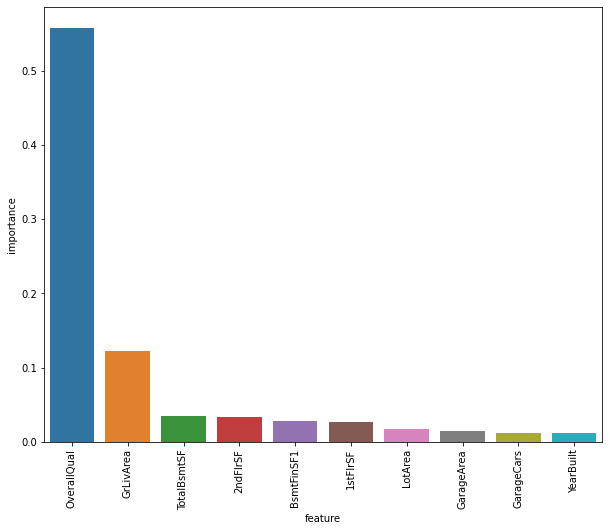

In [158]:
plt.figure(figsize=(10,8))
sns.barplot(data=feature_df.sort_values('importance',ascending=False),x='feature',y='importance')
plt.xticks(rotation=90)

In [70]:
sample_df.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [191]:
def clean_test_data(df):
  data=df.copy()
  data[numerical_cols]=imputer.transform(data[numerical_cols])
  data[encode_cols]=encoder.transform(data[categorical_cols])
  data[numerical_cols+encode_cols]=scaler.transform(data[numerical_cols+encode_cols])
  data=data[numerical_cols+encode_cols]
  preds=model.predict(data)
  return preds



In [192]:
clean_test_data(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


array([127500. , 152297.5, 176155. , ..., 165187.5, 118630. , 221094.4])

In [193]:
test_preds=clean_test_data(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [194]:
submission_df=pd.DataFrame({'Id':test_df["Id"],'SalePrice':test_preds})

In [195]:
submission_df.to_csv('submission_2.csv',index=False)

In [179]:
def optmise_hyperprametr(**params):
  model=RandomForestRegressor(**params,n_jobs=-1,random_state=42).fit(train_inputs,train_outputs)
  
  return model.score(val_inputs,val_outputs)


In [187]:
optmise_hyperprametr(n_estimators=20,max_depth=30,max_features=0.6)

0.9016449248281706

In [198]:
df.describe([0.25,0.6])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.504124e-16,3.410514e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,1.032983e-15,4.518912e-15,1.630355e-16,1.505645e-17,1.653168e-16,...,-4.346694e-16,-3.406712e-16,-2.103530e-17,6.522180e-16,-4.227973e-17,-5.270708e-16,4.404772e-17,-1.320291e-16,-5.969350e-17,2.098778e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.227875e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.744105e-01,-9.730182e-01,-2.886528e-01,...,-5.862104e-02,-3.019617e-01,-4.537649e-02,-2.562180e+00,-2.726158e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,-2.138345e+00,-3.059950e-01
25%,-8.725628e-01,-4.564744e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.744105e-01,-9.730182e-01,-2.886528e-01,...,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-2.726158e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
50%,-1.631095e-01,6.454645e-16,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.744105e-01,-1.319022e-01,-2.886528e-01,...,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-2.726158e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
60%,7.337496e-02,6.454645e-16,-3.193355e-02,-7.183611e-02,-5.171998e-01,4.216997e-01,6.364005e-01,-4.348039e-01,1.797604e-01,-2.886528e-01,...,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-2.726158e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
max,3.147673e+00,1.103492e+01,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.289499e+00,1.140575e+01,8.851638e+00,...,1.705872e+01,3.311678e+00,2.203785e+01,3.902926e-01,3.668167e+00,1.907878e+01,1.098484e+01,8.485281e+00,4.676514e-01,3.268027e+00


## Conclusion
Here's the takeaway: Models can suffer from either:

- `Overfitting`: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- `Underfitting`: failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

## The use of Pipeline
<font size = 5>

**Pipelines** are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

- **Cleaner Code**: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.

- **Fewer Bugs**: There are fewer opportunities to misapply a step or forget a preprocessing step.

- **Easier to Productionize**: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.


More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

In [199]:
from sklearn.pipeline import Pipeline

In [200]:
from sklearn.model_selection import cross_val_score

In [206]:
cross_val_score(model,val_inputs,val_outputs,cv=6,n_jobs=-1,scoring='neg_mean_poisson_deviance').mean()

-5079.340685916515

Scoring are as follows `'explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted']`

# XGBOOST Technique to find the prediction 

Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
4. Finally, we add the new model to ensemble, and ...
5. ... repeat!

XGBoost stands for extreme gradient boosting, which is an implementation of gradient boosting with several additional features focused on performance and speed. (Scikit-learn has another version of gradient boosting, but XGBoost has some technical advantages.)



In [207]:
!pip install xgboost --upgrade --q

     |████████████████████████████████| 193.7 MB 30 kB/s 


In [208]:
from xgboost import XGBRegressor

In [209]:
model2=XGBRegressor()

In [210]:
model2.fit(train_inputs,train_outputs)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [211]:
from sklearn.metrics import mean_absolute_error

In [214]:
prediction=model2.predict(val_inputs)
print("Mean Absolute Error: " + str(mean_absolute_error(prediction,val_outputs)))

Mean Absolute Error: 17750.76826038099


In [217]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [218]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [221]:
def clean_test_data(df):
  data=df.copy()
  data[numerical_cols]=imputer.transform(data[numerical_cols])
  data[encode_cols]=encoder.transform(data[categorical_cols])
  data[numerical_cols+encode_cols]=scaler.transform(data[numerical_cols+encode_cols])
  data=data[numerical_cols+encode_cols]
  preds=model2.predict(data)
  submission_df['Id']=test_df['Id']
  submission_df['SalePrice']=preds
  submission_df.to_csv('submission_XGBOOST.csv',index=False)

In [222]:
clean_test_data(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


## Let us predict the result using Neural networks

In [223]:
import tensorflow as tf
from tensorflow import keras
import keras